<a href="https://colab.research.google.com/github/NJain121442/course2020/blob/master/Fruits_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
!unzip /content/Fruits.zip -d /content/

Archive:  /content/Fruits.zip
replace /content/Fruits/1.jfif? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Fruits/1.jfif  
  inflating: /content/Fruits/10.jfif  
  inflating: /content/Fruits/100.jfif  
  inflating: /content/Fruits/101.jfif  
  inflating: /content/Fruits/102.jfif  
  inflating: /content/Fruits/103.jfif  
  inflating: /content/Fruits/104.jfif  
  inflating: /content/Fruits/105.jfif  
  inflating: /content/Fruits/106.jfif  
  inflating: /content/Fruits/107.jfif  
  inflating: /content/Fruits/108.jfif  
  inflating: /content/Fruits/109.jfif  
  inflating: /content/Fruits/11.jfif  
  inflating: /content/Fruits/110.jfif  
  inflating: /content/Fruits/111.jfif  
  inflating: /content/Fruits/112.jfif  
  inflating: /content/Fruits/113.jfif  
  inflating: /content/Fruits/114.jfif  
  inflating: /content/Fruits/115.jfif  
  inflating: /content/Fruits/116.jfif  
  inflating: /content/Fruits/117.jfif  
  inflating: /content/Fruits/118.jfif  
  inflating: /content/

In [111]:
import glob

In [112]:
Data_path = "/content/Fruits/"

In [113]:
filelist = glob.glob(Data_path+'/*.jfif')

In [114]:
filelist[2]

'/content/Fruits/2.jfif'

In [115]:
len(filelist)

126

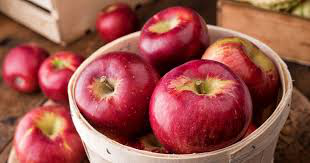

In [116]:
from PIL import Image

Image.open(filelist[125])

In [117]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(filelist[99])

img.shape
#cv2_imshow(img)


(216, 234, 3)

Lets Resize all images to same size

In [123]:
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
  def __init__(self,path,new_size = 225):
    self.filelist = glob.glob(path+'/*.jfif')
    self.new_size = new_size

  def __len__(self):
    return len(self.filelist)

  def __getitem__(self, idx):
    img = cv2.imread(self.filelist[idx])
    img = cv2.resize(img,(self.new_size,self.new_size))
    img = transforms.ToTensor()(img)
    return img

In [129]:
Data = CustomDataset(Data_path)
Data[1].shape

torch.Size([3, 225, 225])